In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
df.columns=["Classes", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline",]
df.head()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.drop("Classes",axis=1)
y = df["Classes"]

In [5]:
class LDA:
    def __init__(self,k):
        self.target_variance = k
#         self.n = n
    def centrallise_data(self,X):
        X = np.array(X)
        r,c = X.shape
        for i in range(c):
            mean = np.mean(X[:,i])
            for j in range(r):
                X[j,i] = X[j,i] - mean
        return X
    def classWiseData(self,X,y):
        # X is Dataframe, y is Series
        classWiseDataindex = [y[y == i].index for i in np.unique(y)]
        return classWiseDataindex
    def Sw(self,X,y):
        classwisedata = self.classWiseData(X,y)
        r,c = X.shape
        S = np.zeros((c,c),dtype = float)
        for i in range(len(classwisedata)):
            S += np.cov(X.iloc[classwisedata[i],:].T)
#         print(S)
        return S
    def Sb(self,X,y):
        classwisedata = self.classWiseData(X,y)
        r,c = X.shape
        S = np.zeros((c,c),dtype = float)
        overall_mean = np.mean(X,axis = 0)
        for ind in classwisedata:
            m = np.subtract(np.mean(X.iloc[ind,:],axis = 0),overall_mean)
            m = np.array(m)
            m = m.reshape(X.shape[1],1)
            S += len(ind)*np.matmul(m,m.T)
            print(S)
        return S
    def sort_eigenvalues(self,evalues,evectors):
#         first we will convert them to list of tuples
        eigen = [(abs(evalues[i]),i,evectors[:,i]) for i in range(len(evalues))]
#         print(eigen)
        eigen.sort()
#         print(np.array(eigen))
        return eigen  # list of  (int,ndarray(3,)) in ascending order
    def get_eigen(self,Sw,Sb):
        d,d = Sw.shape
        mat = np.matmul(np.linalg.inv(Sw),Sb)
#         print(mat)
        eigenvalue,eigenvector = np.linalg.eig(mat)
        eigens = self.sort_eigenvalues(eigenvalue,eigenvector)
        self.eigens = eigens # ascending Order
        return eigens
    def explained_variance(self,eigens):
        sumofEigenValues = 0
        for ind,tup in enumerate(self.eigens):
            sumofEigenValues += tup[0]
        contribution = [eigens[i][0]/sumofEigenValues for i in range(len(eigens))] 
        return contribution
    def cumulativeVariance(self,expVariance,k):
        return np.sum(expVariance[-1:-k-1:-1])
    def Optimal_PC(self,X,y):
        r,d = X.shape
        X.iloc[:,:] = self.centrallise_data(X)
        sw = self.Sw(X,y)
        sb = self.Sb(X,y)
        eigens = self.get_eigen(sw,sb)
        explainedVariances = self.explained_variance(eigens)
        optimaln = 1
        plt.bar(height = explainedVariances, x = ["pc_" + str(d-i) for i in range(d)] )
        plt.show()
        for i in range(1,d+1):
            if(self.cumulativeVariance(explainedVariances,i) >= self.target_variance):
                optimaln = i
                break
#         Transfoming Data
#         optimaln = self.n
#         print(eigens)
        print(optimaln)
        all_pc = [eigens[-1*i][2] for i in range(1,optimaln+1)]
#         print(all_pc)
        all_pc = np.array(all_pc)
#         X . transpose(eigen vector) to get transform data
        transformed_X = np.matmul(X,all_pc.transpose())
#         print(transformed_X)
        return transformed_X
    
    
        

[[ 3.26698435e+01 -1.42980810e+01  3.91076776e+00 -1.07899783e+02
   2.89649650e+02  2.39299372e+01  4.18446046e+01 -3.15464195e+00
   1.35408682e+01  2.06441116e+01  4.59162796e+00  2.39762153e+01
   1.61924422e+04]
 [-1.42980810e+01  6.25760938e+00 -1.71156235e+00  4.72227494e+01
  -1.26766268e+02 -1.04730278e+01 -1.83134500e+01  1.38064102e+00
  -5.92621235e+00 -9.03497379e+00 -2.00954340e+00 -1.04932816e+01
  -7.08668375e+03]
 [ 3.91076776e+00 -1.71156235e+00  4.68141344e-01 -1.29162233e+01
   3.46727254e+01  2.86455082e+00  5.00903932e+00 -3.77628746e-01
   1.62091964e+00  2.47121864e+00  5.49644218e-01  2.87009057e+00
   1.93832826e+03]
 [-1.07899783e+02  4.72227494e+01 -1.29162233e+01  3.56364216e+02
  -9.56635572e+02 -7.90342028e+01 -1.38201573e+02  1.04189413e+01
  -4.47218777e+01 -6.81819969e+01 -1.51649230e+01 -7.91870469e+01
  -5.34793195e+04]
 [ 2.89649650e+02 -1.26766268e+02  3.46727254e+01 -9.56635572e+02
   2.56802332e+03  2.12161958e+02  3.70992751e+02 -2.79689414e+01


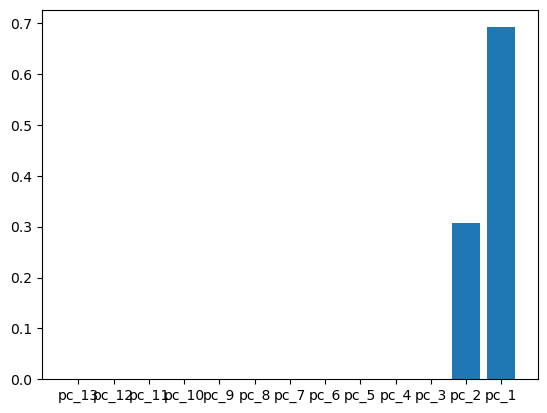

2


In [6]:
ob = LDA(0.94)
new_x = ob.Optimal_PC(X,y)


(178, 2)


C:\Users\vidit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vidit\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


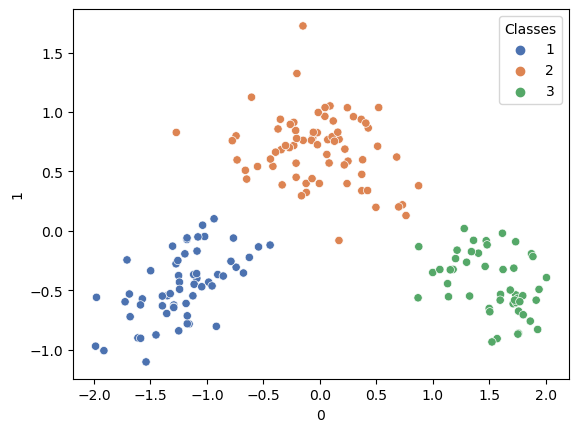

In [7]:
# sns.scatterplot(new_x,y = [2 for i in range(len(new_x))],hue = y,palette = 'deep')
print(new_x.shape)
sns.scatterplot(new_x.iloc[:,0],new_x.iloc[:,1],hue = y,palette = 'deep')
plt.show()